In [1]:
import mglearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

ここでは簡単に多層パーセプトロンのクラス分類にのみ言及する<br>
詳しい部分は他の本で確認しているため説明よりコードを多めに記載<br>

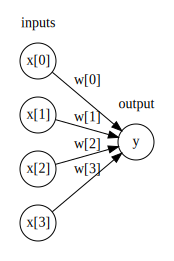

In [2]:
display(mglearn.plots.plot_logistic_regression_graph())

左の層は特徴量を表しwは各特徴に対する重みを表現している<br>
中間ステップを表す隠れユニットの計算で重み付き和が行われ、次にこの隠れユニットの値に対して重み付きわが行われて最後の出力がなされる

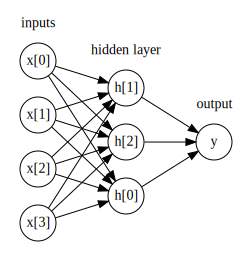

In [3]:
display(mglearn.plots.plot_single_hidden_layer_graph())

このモデルでは学習する係数が多くある。<br>
すべての入力ノードから隠れ層の間に一つずつあり隠れ層から出力層にそれぞれ1つずつある<br>
隠れ層の重み付き和に対して活性化関数と呼ばれる非線形関数やtanhを用い、この関数の結果が出力yのための重み付き和に使用される<br>

Text(0,0.5,'relu(x),tanh(x)')

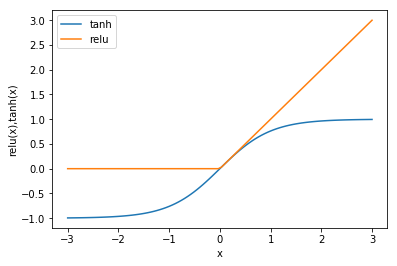

In [4]:
line=np.linspace(-3,3,100)
plt.plot(line,np.tanh(line),label="tanh")
plt.plot(line,np.maximum(line,0),label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x),tanh(x)")

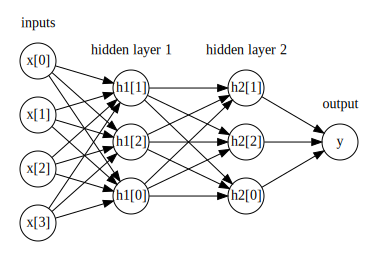

In [5]:
mglearn.plots.plot_two_hidden_layer_graph()

two_moonsデータセットに対してMLPClassifierを適用

Text(0,0.5,'Feature 1')

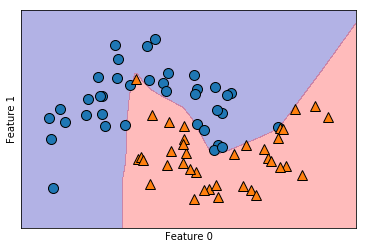

In [10]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=100,noise=0.25,random_state=3)
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=42)
mlp = MLPClassifier(solver='lbfgs',random_state=0).fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0,0.5,'Feature 1')

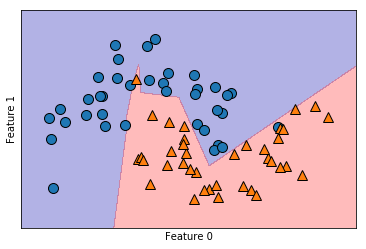

In [18]:
#隠れ層のデフォルトが100なので少し減らす
mlp = MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes=[10])
mlp.fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0,0.5,'Feature 1')

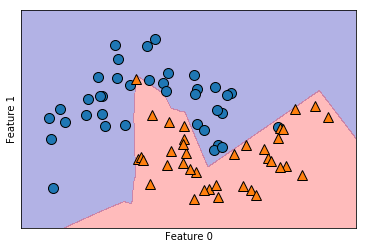

In [20]:
# 隠れ層を2つにする
mlp = MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes=[10,10])
mlp.fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0,0.5,'Feature 1')

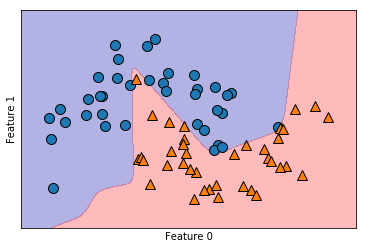

In [21]:
#活性化関数をtanhにする。（デフォルトはRelu)
mlp = MLPClassifier(solver='lbfgs',activation = 'tanh',random_state=0,hidden_layer_sizes=[10])
mlp.fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

リッジ回帰で行ったようにL2ノルム正則化を行うことができ、alphaで調節できる

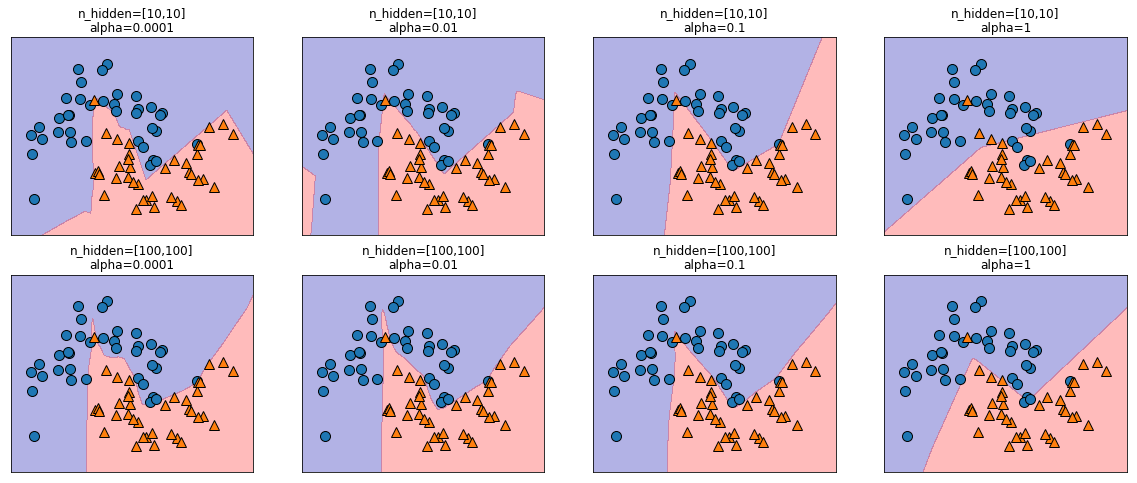

In [30]:
fig,axes = plt.subplots(2,4,figsize=(20,8))
for axx,n_hidden_nodes in zip(axes,[10,100]):
    for ax,alpha in zip(axx,[0.0001,0.01,0.1,1]):
        mlp = MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes=[n_hidden_nodes,n_hidden_nodes],alpha=alpha)
        mlp.fit(X_train,y_train)
        mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3,ax=ax)
        mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train,ax=ax)
        ax.set_title("n_hidden=[{},{}]\nalpha={}".format(n_hidden_nodes,n_hidden_nodes,alpha))

重みの乱数の初期化が結果に大きく影響を与える例を以下に上げる

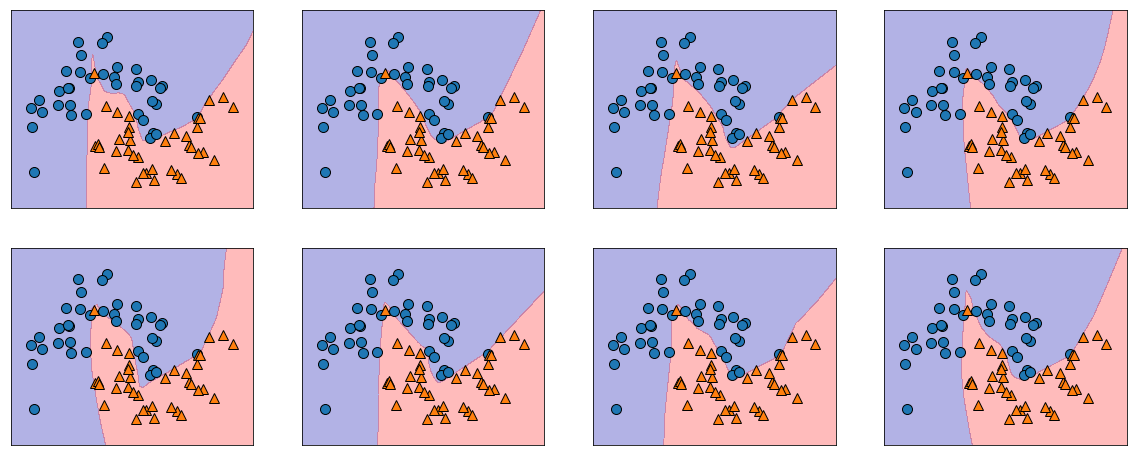

In [31]:
fig,axes = plt.subplots(2,4,figsize=(20,8))
for i,ax in enumerate(axes.ravel()):
    mlp=MLPClassifier(solver='lbfgs',random_state=i,hidden_layer_sizes=[100,100])
    mlp.fit(X_train,y_train)
    mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3,ax=ax)
    mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train,ax=ax)

In [33]:
#重みの初期値
cancer = load_breast_cancer()
print("Cancer data per-feature maxima:\n{}".format(cancer.data.max(axis=0)))

Cancer data per-feature maxima:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [34]:
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=0)

mlp=MLPClassifier(random_state=42)
mlp.fit(X_train,y_train)

print("訓練セット:{:.3f}".format(mlp.score(X_train,y_train)))
print("検証セット:{:.3f}".format(mlp.score(X_test,y_test)))

訓練セット:0.906
検証セット:0.881


初期値だとそこまで精度も高くない<br>
次に平均0、分散1の初期値とする<br>
StandardScalerというライブラリでできるかここでは実際に実装してみる

In [38]:
mean_on_train = X_train.mean(axis=0)
std_on_train = X_train.std(axis=0)
X_train_scaled=(X_train - mean_on_train) / std_on_train
X_test_scaled = (X_test-mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled,y_train)

print("訓練セット:{:.3f}".format(mlp.score(X_train_scaled,y_train)))
print("検証セット:{:.3f}".format(mlp.score(X_test_scaled,y_test)))

訓練セット:0.991
検証セット:0.965


C:\Users\deadl\AppData\Local\conda\conda\envs\tensorflow-1.4.0\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


正規化を行うことで精度がより高くなった。ワーニングはまだ学習結果の収束がしていないため繰り返し回数を増やせというワーニング

In [40]:
#max_iterで繰り返し回数を増やせる
mlp = MLPClassifier(max_iter=1000,random_state=0)
mlp.fit(X_train_scaled,y_train)

print("訓練セット:{:.3f}".format(mlp.score(X_train_scaled,y_train)))
print("検証セット:{:.3f}".format(mlp.score(X_test_scaled,y_test)))

訓練セット:0.993
検証セット:0.972


訓練セットと検証セットに差があるのでまだ性能向上できそうなのでalphaの値を少しいじってみる

In [54]:
mlp = MLPClassifier(max_iter=1000,alpha=1,random_state=0)
mlp.fit(X_train_scaled,y_train)

print("訓練セット:{:.3f}".format(mlp.score(X_train_scaled,y_train)))
print("検証セット:{:.3f}".format(mlp.score(X_test_scaled,y_test)))

訓練セット:0.988
検証セット:0.972


何を学習したのか？ということが解析しにくい<br>
とりあえず重みを見てみる<br>
行は30の特徴量を表し、列は入力～第１隠れ層ユニットに相当。明るい色が正、暗い色が負の値

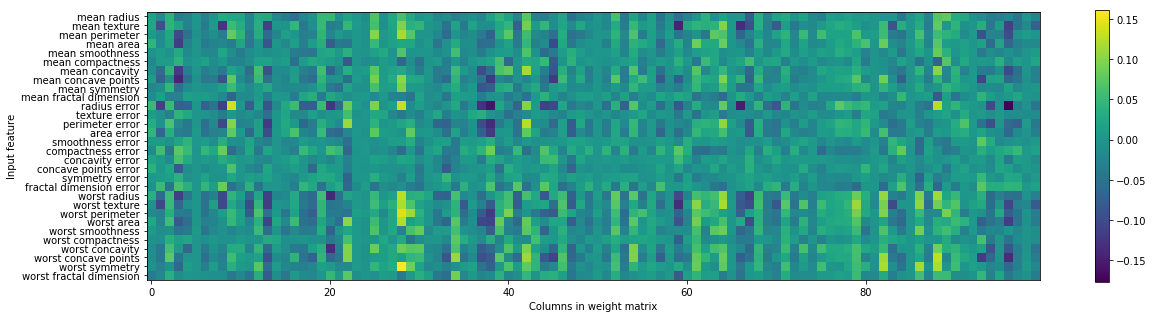

In [56]:
plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0],interpolation='none',cmap='viridis')
plt.yticks(range(30),cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

# 長所、短所、パラメータ

非常に複雑なモデルを構築できる<br>
十分な計算時間とデータ、慎重なパラメータ設定で他の手法よりよい結果を残しやすい<br>
ただし、上記で見たようにデータの前処理（正規化）が重要である<br>
パラメータやチューニングの手法についてはここではごくごく一部なので他の書籍で確認すること<br>
scikit-learnのmlpのアルゴリズムのデフォルトはadam<br>
lbfgsはモデルが頑健だがデータセットが大きいと計算時間が増える<br>